In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from glob import glob
import tensorflow as tf

In [5]:
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.4/997.4 kB 14.0 MB/s eta 0:00:0000:010:01


In [7]:
from tensorflow.keras.preprocessing.image import img_to_array,load_img
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from keras.models import Sequential,Model
from keras.layers import Conv2D,MaxPooling2D,Flatten,Activation,Dense,Dropout
from sklearn.metrics import *
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
from keras.utils import plot_model
from visualkeras import layered_view

In [8]:
train_path='/kaggle/input/brain-tumor-mri-dataset/Training/'
test_path='/kaggle/input/brain-tumor-mri-dataset/Testing/'

In [9]:
#train_path='/content/Training/'
#test_path='/content/Testing/'

In [10]:
test_path

'/kaggle/input/brain-tumor-mri-dataset/Testing/'

In [11]:
from glob import glob
classes=glob(train_path+"/*")
no_of_classes=len(classes)
no_of_classes

4

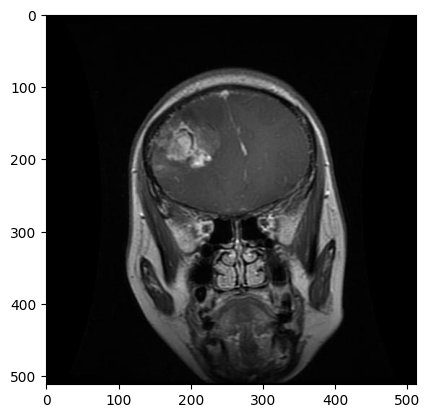

In [14]:
img=load_img(train_path+'glioma/Tr-glTr_0000.jpg')
plt.imshow(img)
plt.show()

In [17]:
img=img_to_array(img)
img.shape[0:2]

(512, 512)

In [15]:
train_gen=ImageDataGenerator(rescale=1/255,validation_split=0.15)#,rotation_range=40,width_shift_range=0.2,
    #height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode="nearest")
val_gen=ImageDataGenerator(rescale=1/255,validation_split=0.15)#,rotation_range=40,width_shift_range=0.2,
    #height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode="nearest")
test_gen=ImageDataGenerator(rescale=1/255,rotation_range=40)#,width_shift_range=0.2,
    #height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode="nearest")
train_datagen=train_gen.flow_from_directory(train_path,target_size=(512,512),color_mode='rgb',class_mode='categorical',batch_size=40)
val_datagen=train_gen.flow_from_directory(train_path,target_size=(512,512),color_mode='rgb',class_mode='categorical',batch_size=40)
test_datagen=test_gen.flow_from_directory(test_path,target_size=(512,512),color_mode='rgb',class_mode='categorical',batch_size=40)

Found 5712 images belonging to 4 classes.
Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [18]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=(img.shape)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(256,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())


model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(1024))

model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('softmax'))

early_stopping=EarlyStopping(monitor='val_accuracy',restore_best_weights=True,mode='max',patience=3)

model_checkpoint=ModelCheckpoint(filepath='/content/drive/MyDrive/Data_science/Porfolio/best_model.keras',monitor='val_accuracy',mode='max')

lr_schedule=tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',min_lr=0.001)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1745149828.856397      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 510, 510, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 510, 510, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 255, 255, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 253, 253, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 253, 253, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 126, 126, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 124, 124, 256)       │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 124, 124, 256)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 62, 62, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 984064)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │     251,920,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4)                   │           4,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 4)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 253,215,108 (965.94 MB)

 Trainable params: 253,215,108 (965.94 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(metrics=['accuracy'],optimizer='Adam',loss='categorical_crossentropy')

In [21]:
hist=model.fit(train_datagen,epochs=15,validation_data=val_datagen,
               callbacks=[model_checkpoint, early_stopping, lr_schedule])

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1745149848.876897     123 service.cc:148] XLA service 0x7898a8006350 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745149848.877995     123 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1745149849.400658     123 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1745149874.496734     123 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


143/143 ━━━━━━━━━━━━━━━━━━━━ 198s 1s/step - accuracy: 0.5507 - loss: 2.1458 - val_accuracy: 0.8871 - val_loss: 0.3087 - learning_rate: 0.0010
Epoch 2/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 119s 817ms/step - accuracy: 0.8817 - loss: 0.3247 - val_accuracy: 0.9569 - val_loss: 0.1205 - learning_rate: 0.0010
Epoch 3/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 118s 810ms/step - accuracy: 0.9511 - loss: 0.1358 - val_accuracy: 0.9715 - val_loss: 0.0901 - learning_rate: 0.0010
Epoch 4/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 119s 819ms/step - accuracy: 0.9725 - loss: 0.0806 - val_accuracy: 0.9918 - val_loss: 0.0269 - learning_rate: 0.0010
Epoch 5/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 120s 825ms/step - accuracy: 0.9837 - loss: 0.0555 - val_accuracy: 0.9958 - val_loss: 0.0153 - learning_rate: 0.0010
Epoch 6/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 121s 829ms/step - accuracy: 0.9751 - loss: 0.0945 - val_accuracy: 0.9965 - val_loss: 0.0115 - learning_rate: 0.0010
Epoch 7/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 120s 827ms/step - accuracy: 0.9928 - l

KeyboardInterrupt: 

In [17]:
hist.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])

In [19]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

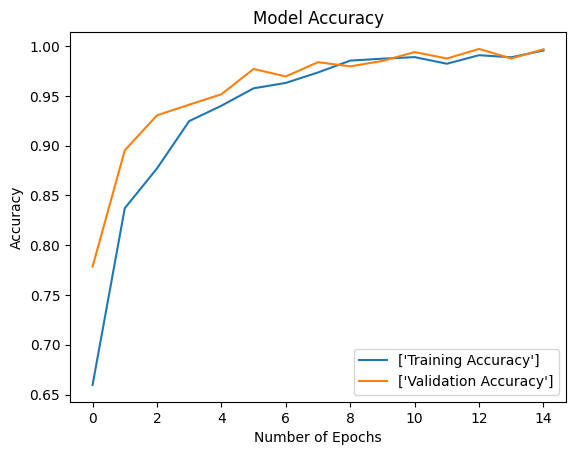

In [20]:
plt.plot(acc,label=['Training Accuracy'])
plt.plot(val_acc,label=['Validation Accuracy'])
plt.legend()
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

In [ ]:
plt.plot(loss,label=['Training Loss'])
plt.plot(val_loss,label=['Validation Loss'])
plt.legend()
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()

In [ ]:
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True, dpi=70)

/usr/local/lib/python3.11/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


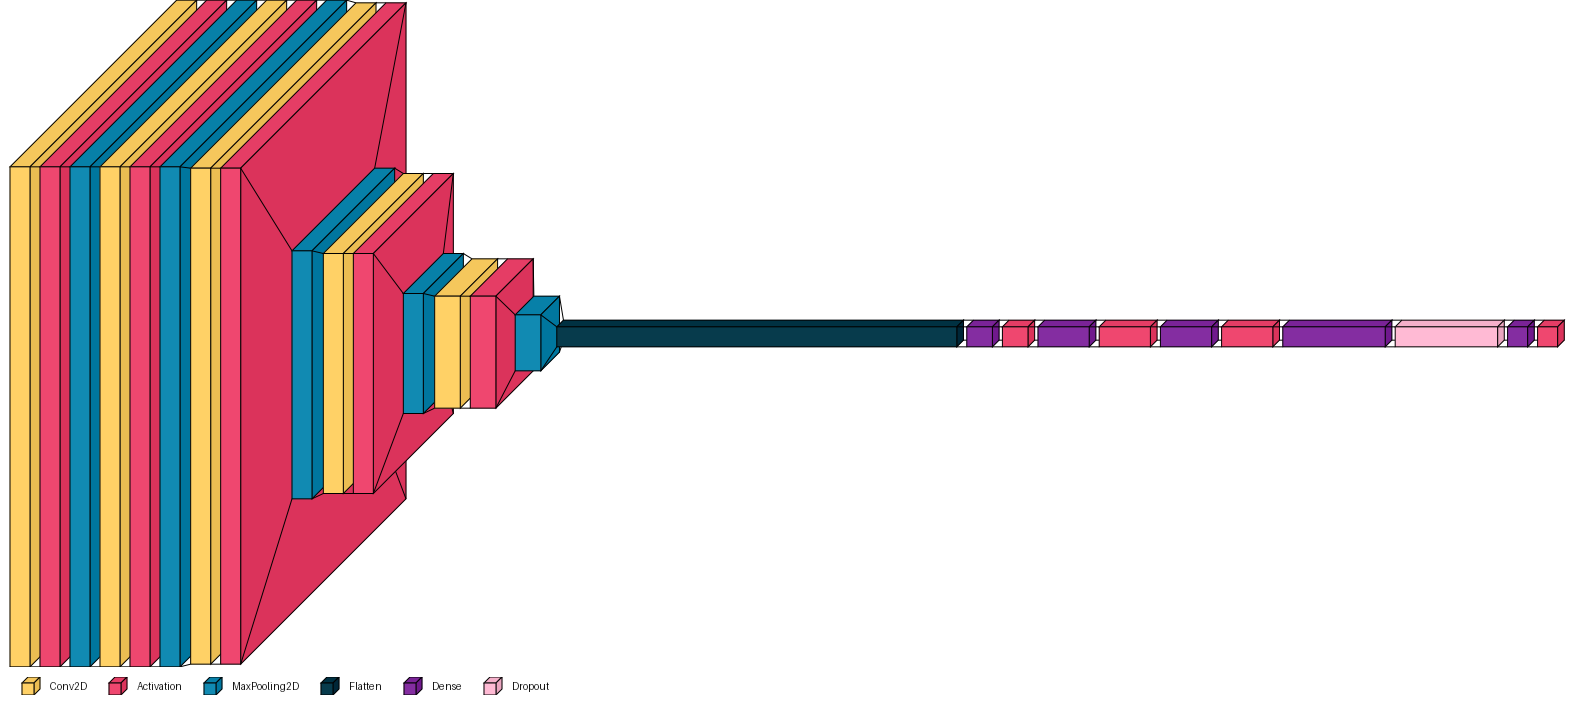

In [20]:
layered_view(model, to_file='model_visualkeras.png', legend=True, max_xy=500)

**Gemini Code for y_pred**

In [22]:
y_pred = model.predict(test_datagen)
y_pred_classes = np.argmax(y_pred, axis=1) #Converts predictions to class labels
y_true = test_datagen.classes #Gets the true labels from the generator.

32/33 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

E0000 00:00:1745150915.858080     123 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1745150916.100600     123 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


33/33 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step


In [23]:
accuracy = accuracy_score(y_true, y_pred_classes)
accuracy

0.28756674294431733

In [32]:
confusion_matrix(y_true, y_pred_classes)

array([[ 48, 140,  64,  48],
       [ 37, 153,  61,  55],
       [ 67, 186,  88,  64],
       [ 46, 119,  85,  50]])

In [33]:
#Precision=tp/(TP+FP)